In [20]:
"""──────────────────────────────────────────────────────────────────────────┐
│ Loading necessary libraries to build and train model                       │
└──────────────────────────────────────────────────────────────────────────"""
import os,sys,gc
import numpy as np
import pickle
import torch
#import proplot as plot
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pandas as pd

sys.path.insert(1, '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/scikit/')
from tools import derive_var,read_and_proc
from tools.mlr import mlr
from tools.preprocess import do_eof,preproc_maria,preproc_haiyan
from tools.validation import r2_analysis
sys.path.insert(2, '../')
import read_stuff as read
%matplotlib inline
#plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',
#                'tick.labelweight':'ultralight','gridminor.linestyle':'--','title.weight':'normal','linewidth':0.5})

In [2]:
import os,glob
from natsort import natsorted
def flatten(l):
    return [item for sublist in l for item in sublist]

In [3]:
lnUr2,lnUssim = read_and_proc.depickle('./3D/store/test/ln_U.test.r2'),read_and_proc.depickle('./3D/store/test/ln_U.test.ssim')
lnVr2,lnVssim = read_and_proc.depickle('./3D/store/test/ln_V.test.r2'),read_and_proc.depickle('./3D/store/test/ln_V.test.ssim')
lnTHr2,lnTHssim = read_and_proc.depickle('./3D/store/test/ln_TH.test.r2'),read_and_proc.depickle('./3D/store/test/ln_TH.test.ssim')

nolnUr2,nolnUssim = read_and_proc.depickle('./3D/store/test/nonln_7_12_U.test.r2'),read_and_proc.depickle('./3D/store/test/nonln_7_12_U.test.ssim')
nolnVr2,nolnVssim = read_and_proc.depickle('./3D/store/test/nonln_7_12_V.test.r2'),read_and_proc.depickle('./3D/store/test/nonln_7_12_V.test.ssim')
nolnTHr2,nolnTHssim = read_and_proc.depickle('./3D/store/test/nonln_7_12_TH.test.r2'),read_and_proc.depickle('./3D/store/test/nonln_7_12_TH.test.ssim')

In [4]:
len(nolnUr2)

5

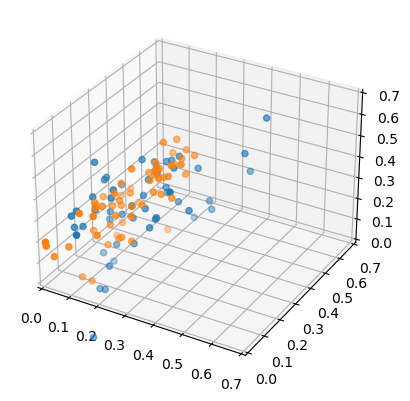

In [16]:
#### from mpl_toolkits import mplot3d
colos = ['r','b','k','yellow','m','g','royalblue']
#plot.rc.metacolor = 'k'
#plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'w','title.color':'k','fontname': 'Source Sans Pro', 'fontsize': 11,'linewidth':1.25})
#plot.rc.axesfacecolor = 'w'

ax1 = plt.axes(projection='3d')#refaspect=1.931,share=False)
#for ind,allmodel in enumerate(allmodels[0:7]):
#    for model in allmodel['val']:
#        ax1.plot(np.log10(model),c=colos[ind],lw=0.5,alpha=0.5,ls='--')
ax1.scatter(np.ma.masked_less(flatten(lnUr2),0),np.ma.masked_less(flatten(lnVr2),-0.5),np.ma.masked_less(flatten(lnTHr2),-0.5))
ax1.scatter(np.ma.masked_less(flatten(nolnUr2[0]),0),np.ma.masked_less(flatten(nolnVr2[0]),-0.5),np.ma.masked_less(flatten(nolnTHr2[0]),-0.5))
#ax1.plot([np.log10(np.mean(obj)) for obj in valslasts],lw=2.5,c='r',label='Validation')
#ax1.axhline(y=np.log10(np.mean(np.asarray(flatten(linear_train)))),lw=1.5,ls='--',c='k',label='Training (Linear)')
#ax1.axhline(y=np.log10(np.mean(np.asarray(flatten(linear_val)))),lw=1.5,ls='--',c='r',label='Validation (Linear)')
#ax1.legend(loc=1,ncols=2,prop={'size':9})
#ax1.format(ylabel='Loss, Logarithmic Units', xlabel='Number of Nonlinear Layers',ltitle='Haiyan 3D',rtitle='Mean Loss')
ax1.set_xlim(0,0.7)
ax1.set_ylim(0,0.7)
ax1.set_zlim(0,0.7)
#plt.savefig('./pic/1228/haiyan3d_loss_nonlinear.png',dpi=300)
plt.show()

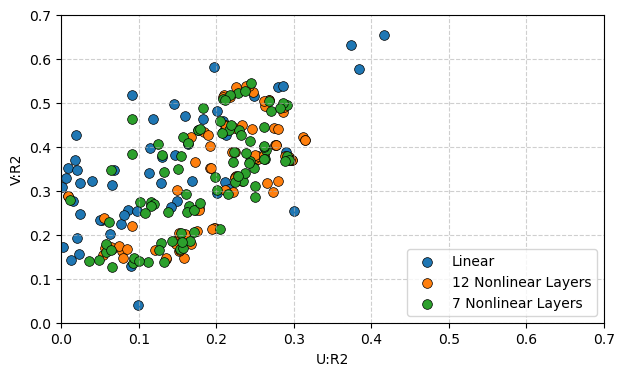

In [6]:

plt,ax1 = plt.subplots(1,1,figsize=(7,4))#refaspect=1.931,share=False)
#for ind,allmodel in enumerate(allmodels[0:7]):
#    for model in allmodel['val']:
#        ax1.plot(np.log10(model),c=colos[ind],lw=0.5,alpha=0.5,ls='--')
ax1.scatter(np.ma.masked_less(flatten(lnUr2),0),np.ma.masked_less(flatten(lnVr2),-0.5),s=49,linewidths=0.5,edgecolors='k',label='Linear')
ax1.scatter(np.ma.masked_less(flatten(nolnUr2[-1]),0),np.ma.masked_less(flatten(nolnVr2[-1]),-0.5),s=49,linewidths=0.5,edgecolors='k',label='12 Nonlinear Layers')
ax1.scatter(np.ma.masked_less(flatten(nolnUr2[0]),0),np.ma.masked_less(flatten(nolnVr2[0]),-0.5),s=49,linewidths=0.5,edgecolors='k',label='7 Nonlinear Layers')
#ax1.plot([np.log10(np.mean(obj)) for obj in valslasts],lw=2.5,c='r',label='Validation')
#ax1.axhline(y=np.log10(np.mean(np.asarray(flatten(linear_train)))),lw=1.5,ls='--',c='k',label='Training (Linear)')
#ax1.axhline(y=np.log10(np.mean(np.asarray(flatten(linear_val)))),lw=1.5,ls='--',c='r',label='Validation (Linear)')
#ax1.legend(loc=1,ncols=2,prop={'size':9})
#ax1.format(ylabel='Loss, Logarithmic Units', xlabel='Number of Nonlinear Layers',ltitle='Haiyan 3D',rtitle='Mean Loss')
ax1.set_xlim(0,0.7)
ax1.set_ylim(0,0.7)
ax1.legend(loc=4)
ax1.grid(alpha=0.6,ls='--')
ax1.set_xlabel('U:R2')
ax1.set_ylabel('V:R2')
plt.savefig('./r2_uv.png',dpi=300)
plt.show()

## Choose model

In [7]:
bestsplit,bestexp = np.unravel_index(np.argsort(np.asarray(lnUr2).ravel()),np.asarray(lnUr2).shape)[0][-3:],np.unravel_index(np.argsort(np.asarray(lnUr2).ravel()),np.asarray(lnUr2).shape)[1][-3:]

In [8]:
from tools.validation import r2_analysis
class OptimMLR_all_3D_simple(torch.nn.Module):
    def __init__(self):
        #super(OptimMLR_all_2D, self).__init__()
        super(OptimMLR_all_3D_simple, self).__init__()
        ############################################################
        # Input channels
        ############################################################
        brchsize = [50,38,91,8,82,20,20]
        self.dense1 = torch.nn.Linear(brchsize[0], 1)
        self.dense2 = torch.nn.Linear(brchsize[1], 1)
        self.dense3 = torch.nn.Linear(brchsize[2], 1)
        self.dense4 = torch.nn.Linear(brchsize[3], 1)
        self.dense5 = torch.nn.Linear(brchsize[4], 1)
        self.dense6 = torch.nn.Linear(brchsize[5], 1)
        self.dense7 = torch.nn.Linear(brchsize[6], 1)
        ############################################################
        # Final Dense Layer
        ############################################################
        self.denseout = torch.nn.Linear(7,96)#106)
        
    def forward(self,X):
        brchindex = list(np.asarray([0,50,38,91,8,82,20,20]).cumsum())
        X_u, X_v, X_w, X_th = X[:,brchindex[0]:brchindex[1]],X[:,brchindex[1]:brchindex[2]],X[:,brchindex[2]:brchindex[3]],X[:,brchindex[3]:brchindex[4]]
        X_hdia, X_lw, X_sw = X[:,brchindex[4]:brchindex[5]],X[:,brchindex[5]:brchindex[6]],X[:,brchindex[6]:brchindex[7]]
        ############################################################
        # Optimal PC layer
        ############################################################
        bestu = self.dense1(X_u)
        bestv = self.dense2(X_v)
        bestw = self.dense3(X_w)
        bestth = self.dense4(X_th)
        besthdia = self.dense5(X_hdia)
        bestlw = self.dense6(X_lw)
        bestsw = self.dense7(X_sw)
        ############################################################
        # Concat
        ############################################################
        bestPC = torch.cat((bestu,bestv,bestw,bestth,besthdia,bestlw,bestsw),1)
        ############################################################
        # Prediction layer
        ############################################################
        outpred = self.denseout(bestPC)
        return outpred

In [9]:
import glob
def output_trainedmodels(splitnum=None,linear='Yes',nonlnnum=None):
    if linear=='Yes':
        modelpaths = sorted(glob.glob('../tmp/torch_try/1115_3d/'+str(splitnum)+'/models*'))
        model = [torch.load(obj) for obj in modelpaths]
    elif linear=='No':
        modelpaths = sorted(glob.glob('../tmp/torch_try/pytorch_3d_nonlinear/'+str(nonlnnum)+'/models'+str(splitnum)+'_'+'*'))
        model = [torch.load(obj) for obj in modelpaths]        
    return model

In [10]:
goodmodels = []
for ind,obj in enumerate(bestsplit):
    goodmodels.append(output_trainedmodels(int(obj),'Yes',0)[int(bestexp[ind])])

In [12]:
import importlib,analysis
importlib.reload(analysis)

<module 'analysis' from '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/TCG_Rad_keras/analysis/analysis.py'>

In [13]:
bestparams,bestnames = [],[]
for i in range(len(goodmodels)):
    a,b = analysis.analysis_trainedmodels(None,None,None,None,None,None,None,None,None,'Yes',0).model_outweights(goodmodels[i])
    bestparams.append(a)
    bestnames.append(b)

### XAI

In [14]:
import seaborn as sns

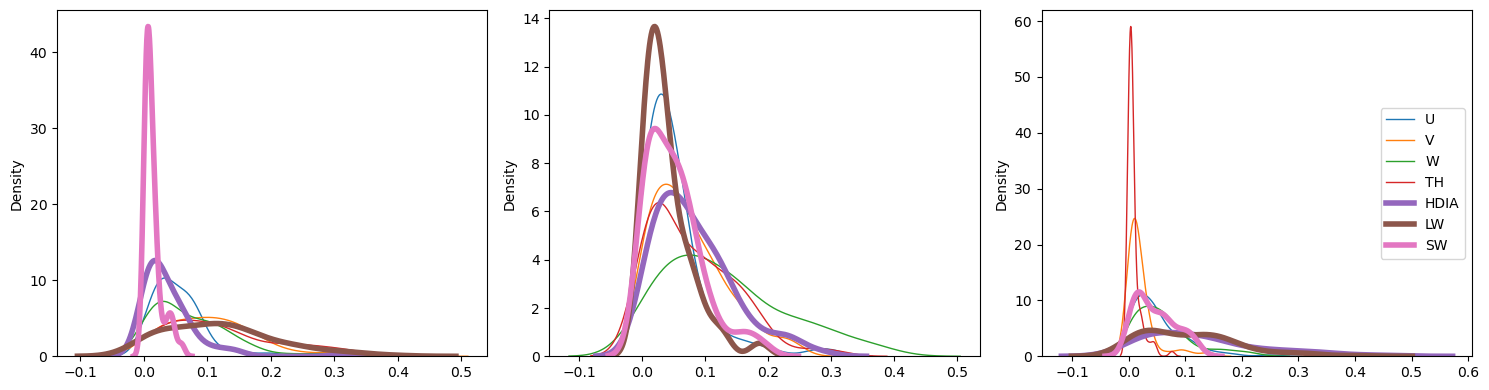

In [39]:
modelind = 0
fig,ax1 = plt.subplots(1,3,figsize=(15,4))
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,0]),label='U',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,1]),label='V',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,2]),label='W',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,3]),label='TH',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,4]),label='HDIA',ax=ax1[modelind],lw=4)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,-2]),label='LW',ax=ax1[modelind],lw=4)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,-1]),label='SW',ax=ax1[modelind],lw=4)

modelind = 1
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,0]),label='U',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,1]),label='V',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,2]),label='W',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,3]),label='TH',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,4]),label='HDIA',ax=ax1[modelind],lw=4)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,-2]),label='LW',ax=ax1[modelind],lw=4)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,-1]),label='SW',ax=ax1[modelind],lw=4)

modelind = 2
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,0]),label='U',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,1]),label='V',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,2]),label='W',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,3]),label='TH',ax=ax1[modelind],lw=1)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,4]),label='HDIA',ax=ax1[modelind],lw=4)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,-2]),label='LW',ax=ax1[modelind],lw=4)
sns.kdeplot(np.abs(bestparams[modelind][-1].detach().numpy()[:,-1]),label='SW',ax=ax1[modelind],lw=4)
plt.legend(loc='right')
plt.tight_layout()
plt.sa
plt.show()

In [41]:
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/TCG_Rad_keras/'
folderpath2='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/new3D/'
"""──────────────────────────────────────────────────────────────────────────┐
│ Loading PC structures for custom loss                       
└──────────────────────────────────────────────────────────────────────────"""
pcastore = read.train_optimizedMLR(folderpath,folderpath2,'rhorig','rhorig','3D').pcastore

In [54]:
haiyan_data = read.train_optimizedMLR(folderpath,folderpath2,'rhorig','rhorig','3D').flatarray

In [75]:
modelind = 1
optimU = np.squeeze(np.dot(bestparams[modelind][0].data.numpy(),pcastore['u'].components_[:50,:])).reshape(10,360,208)
optimV = np.squeeze(np.dot(bestparams[modelind][1].data.numpy(),pcastore['v'].components_[:38,:])).reshape(10,360,208) 
optimW = np.squeeze(np.dot(bestparams[modelind][2].data.numpy(),pcastore['w'].components_[:91,:])).reshape(10,360,208) 
optimTH = np.squeeze(np.dot(bestparams[modelind][3].data.numpy(),pcastore['theta'].components_[:8,:])).reshape(10,360,208) 
optimHDIA = np.squeeze(np.dot(bestparams[modelind][4].data.numpy(),pcastore['hdia'].components_[:82,:])).reshape(10,360,208) 
optimLW = np.squeeze(np.dot(bestparams[modelind][5].data.numpy(),pcastore['lw'].components_[:20,:])).reshape(10,360,208) 
optimSW = np.squeeze(np.dot(bestparams[modelind][6].data.numpy(),pcastore['sw'].components_[:20,:])).reshape(10,360,208) 

In [73]:
coefff_mean = [np.mean(np.squeeze(np.dot(bestparams[modelind][5].data.numpy(),pcastore['lw'].components_[:20,:])).reshape(10,360,208)[5,...]) for modelind in range(3)]

In [74]:
coefff_mean

[2.7298136985234203e-07, -2.494816628648042e-06, -3.114525651679048e-07]

/tmp/ipykernel_3944900/270296222.py:4: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'w','title.color':'k','fontname': 'Source Sans Pro', 'fontsize': 11,'linewidth':1.25})


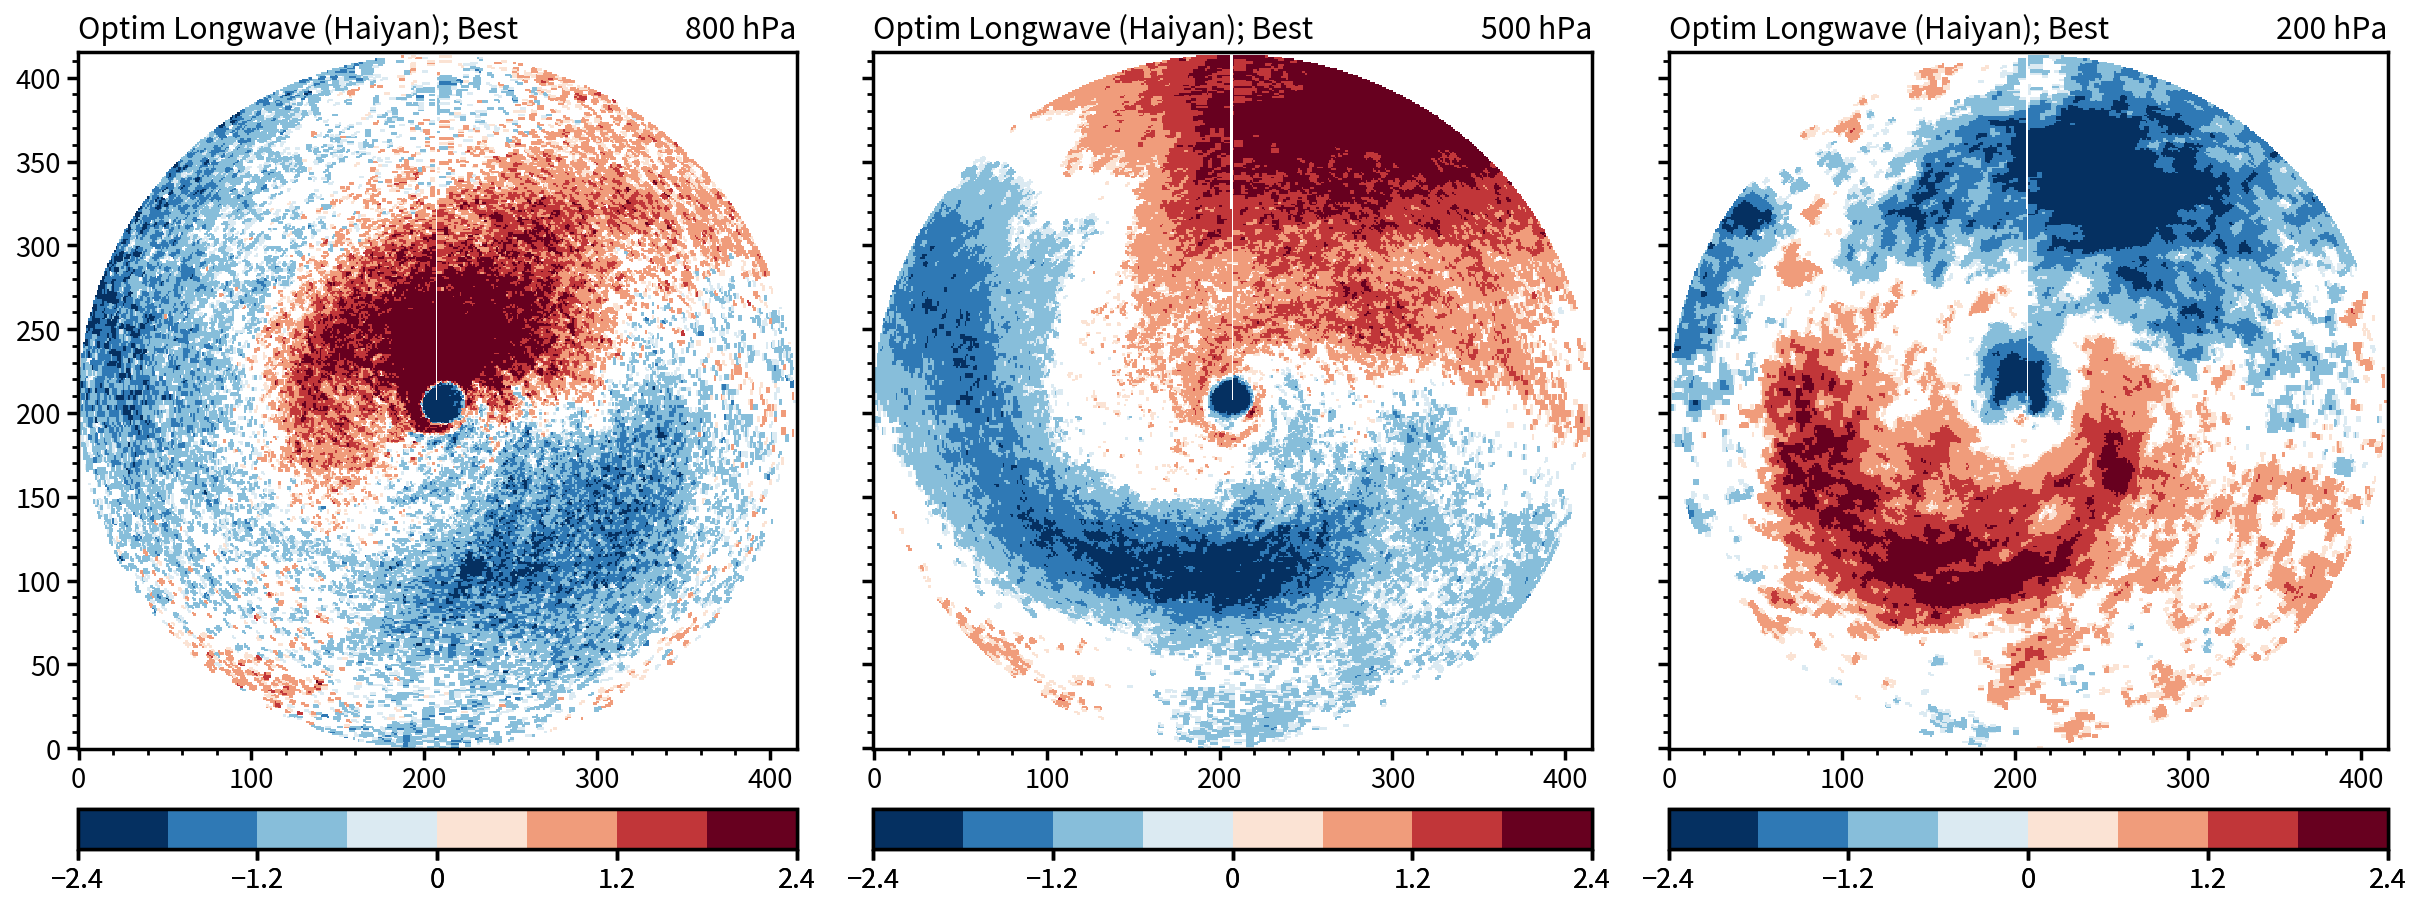

In [53]:
import proplot as plot
ANGLE = read_and_proc.azimuth2angle(np.linspace(0,359,360))
plot.rc.metacolor = 'k'
plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'w','title.color':'k','fontname': 'Source Sans Pro', 'fontsize': 11,'linewidth':1.25})
plot.rc.axesfacecolor = 'w'
def normalize(array):
    return (array-np.nanmean(array))/np.nanstd(array)

fig,axs = plot.subplots(ncols=3,nrows=1,axwidth=3.595,refaspect=1.031)
pressurelevel = [800,500,200]
for i,obj in enumerate([2,5,-2]):
    maps = axs[i].pcolormesh(np.ma.masked_inside(normalize(np.fliplr(np.flipud(read_and_proc.proc_tocart(optimLW[int(obj),...],ANGLE,True,False)))),-.5,.5),cmap='BuRd',vmin=-3,vmax=3)
    axs[i].format(ltitle='Optim Longwave (Haiyan); Best',rtitle=f'{pressurelevel[i]} hPa')
    axs[i].colorbar(maps,loc='b')
plt.savefig('./pic/1228/optimLW_best.png',dpi=400)
plt.show()

/tmp/ipykernel_3944900/102738033.py:4: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'w','title.color':'k','fontname': 'Source Sans Pro', 'fontsize': 11,'linewidth':1.25})


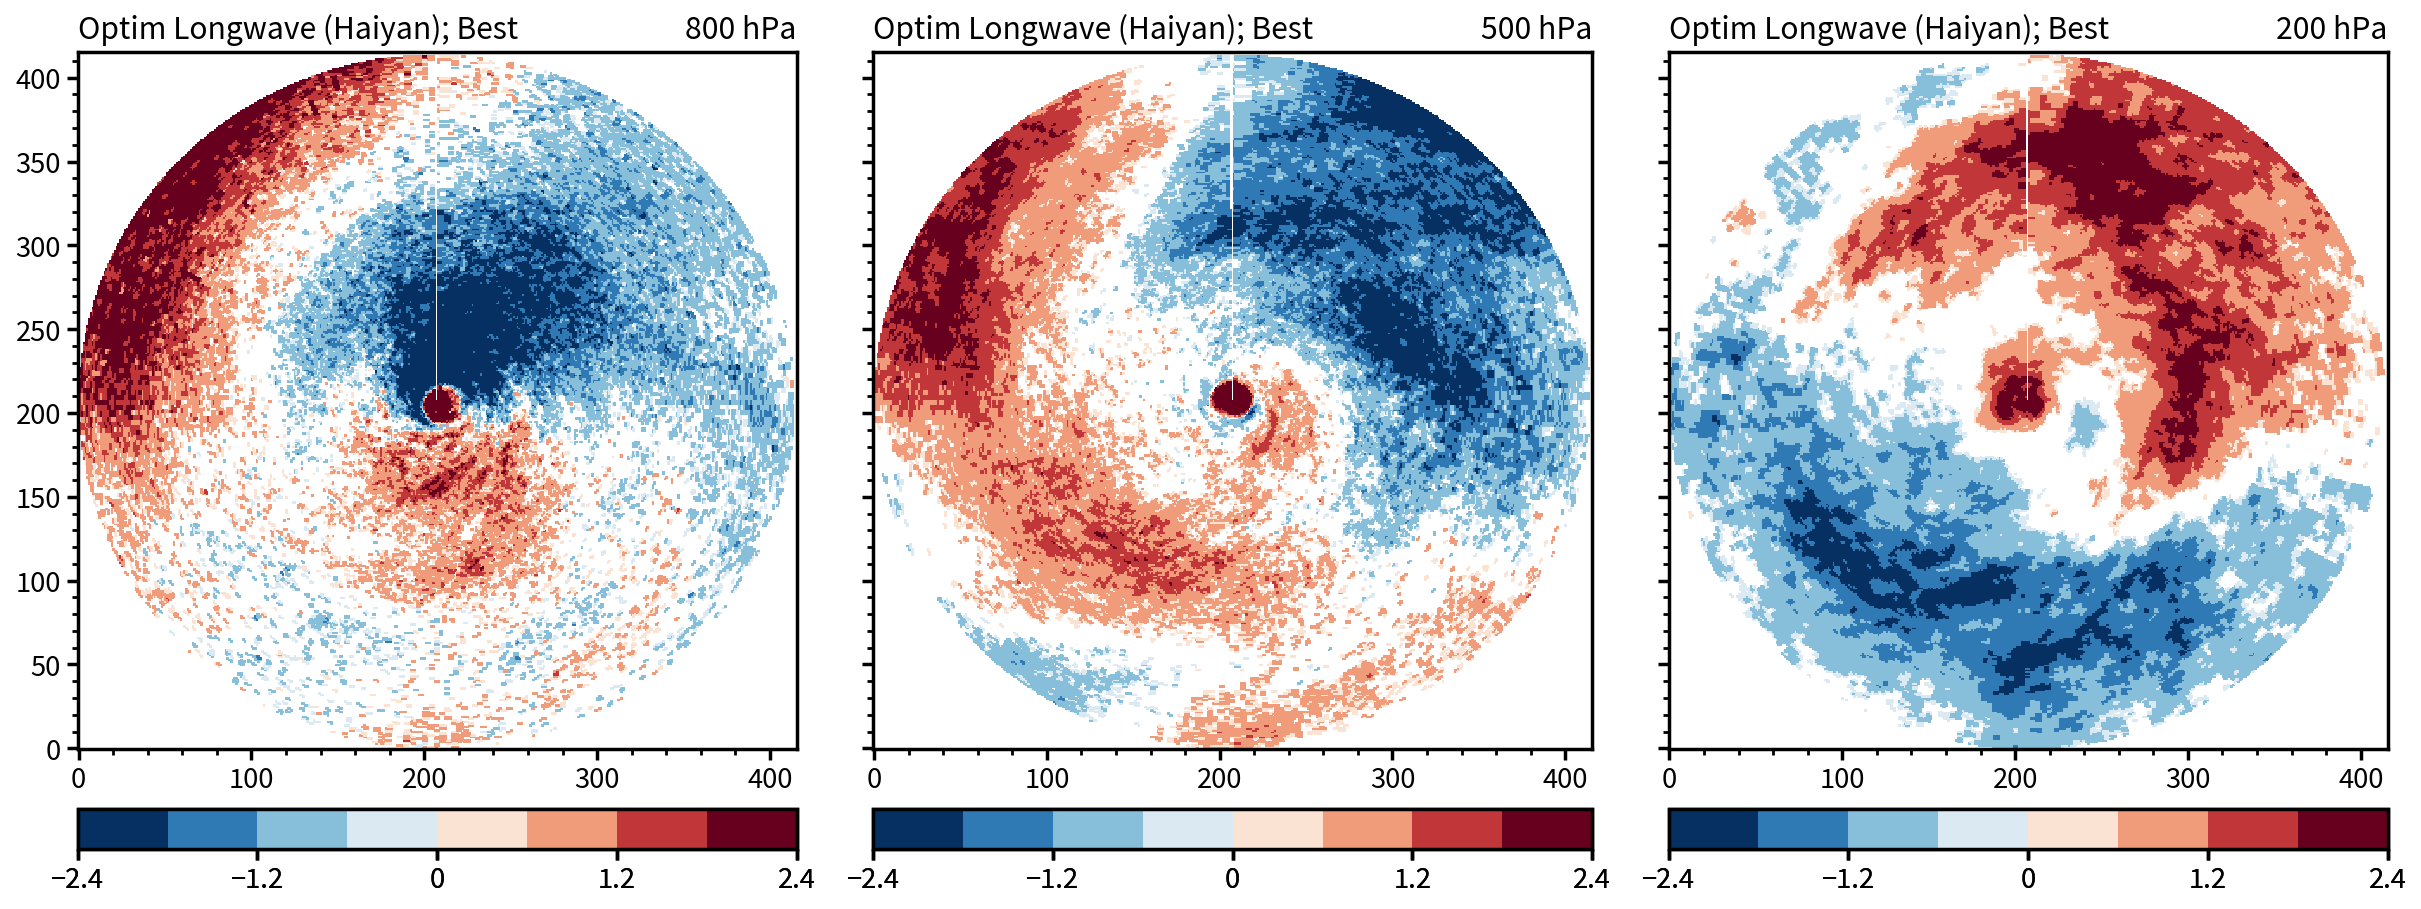

In [76]:
import proplot as plot
ANGLE = read_and_proc.azimuth2angle(np.linspace(0,359,360))
plot.rc.metacolor = 'k'
plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'w','title.color':'k','fontname': 'Source Sans Pro', 'fontsize': 11,'linewidth':1.25})
plot.rc.axesfacecolor = 'w'
def normalize(array):
    return (array-np.nanmean(array))/np.nanstd(array)

fig,axs = plot.subplots(ncols=3,nrows=1,axwidth=3.595,refaspect=1.031)
pressurelevel = [800,500,200]
for i,obj in enumerate([2,5,-2]):
    maps = axs[i].pcolormesh(np.ma.masked_inside(normalize(np.fliplr(np.flipud(read_and_proc.proc_tocart(optimLW[int(obj),...],ANGLE,True,False)))),-.5,.5),cmap='BuRd',vmin=-3,vmax=3)
    axs[i].format(ltitle='Optim Longwave (Haiyan); Best',rtitle=f'{pressurelevel[i]} hPa')
    axs[i].colorbar(maps,loc='b')
#plt.savefig('./pic/1228/optimLW_best.png',dpi=400)
plt.show()

In [57]:
def normalize_timeseries(timeseries=None):
    #assert timeseries['u'].shape[-1]==26,"var shape error"
    obj = (timeseries-np.nanmean(timeseries,axis=0))/np.nanstd(timeseries,axis=0)
    return obj

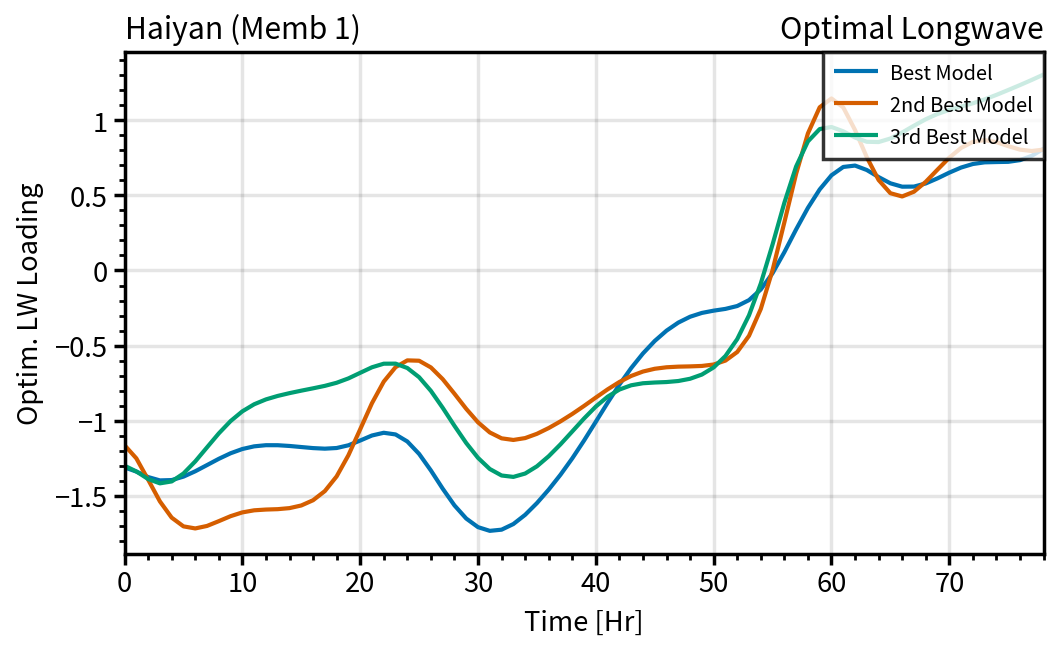

In [78]:
#timeseries_lw = [np.dot(bestparams[i][5].detach().numpy(),normalize_timeseries(pcastore['lw'].transform(haiyan_data['lw'])[:,:20].T)) for i in range(3)]
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=4.595,refaspect=1.831)
axs.plot(normalize_timeseries(np.squeeze(timeseries_lw[2]))[0:79],label='Best Model')
axs.plot(-normalize_timeseries(np.squeeze(timeseries_lw[1]))[0:79],label='2nd Best Model')
axs.plot(normalize_timeseries(np.squeeze(timeseries_lw[0]))[0:79],label='3rd Best Model')
axs.legend(loc='ur',ncols=1,prop={'size':8})
axs.format(xlabel='Time [Hr]',ylabel='Optim. LW Loading',ltitle='Haiyan (Memb 1)',rtitle='Optimal Longwave')
plt.savefig('./pic/1228/optim_LW_timeseries_best.png',dpi=400)
plt.show()

In [87]:
from tqdm.auto import tqdm
path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/'
suffix = '_smooth_preproc_dict1b_g'
a = [read_and_proc.depickle(path+'TCGphy/2020_TC_CRF/dev/freddy0218/testML/output/haiyan/processed/uvwheat/'+'mem'+str(lime)+suffix)['u'].shape for lime in tqdm(range(1,21))]
# divide experiments reference
divider = np.asarray([aobj[0] for aobj in a]).cumsum()

  0%|          | 0/20 [00:00<?, ?it/s]

In [88]:
divider

array([ 103,  180,  267,  378,  473,  557,  664,  751,  786,  818,  924,
        991, 1063, 1150, 1250, 1287, 1371, 1459, 1539, 1565])

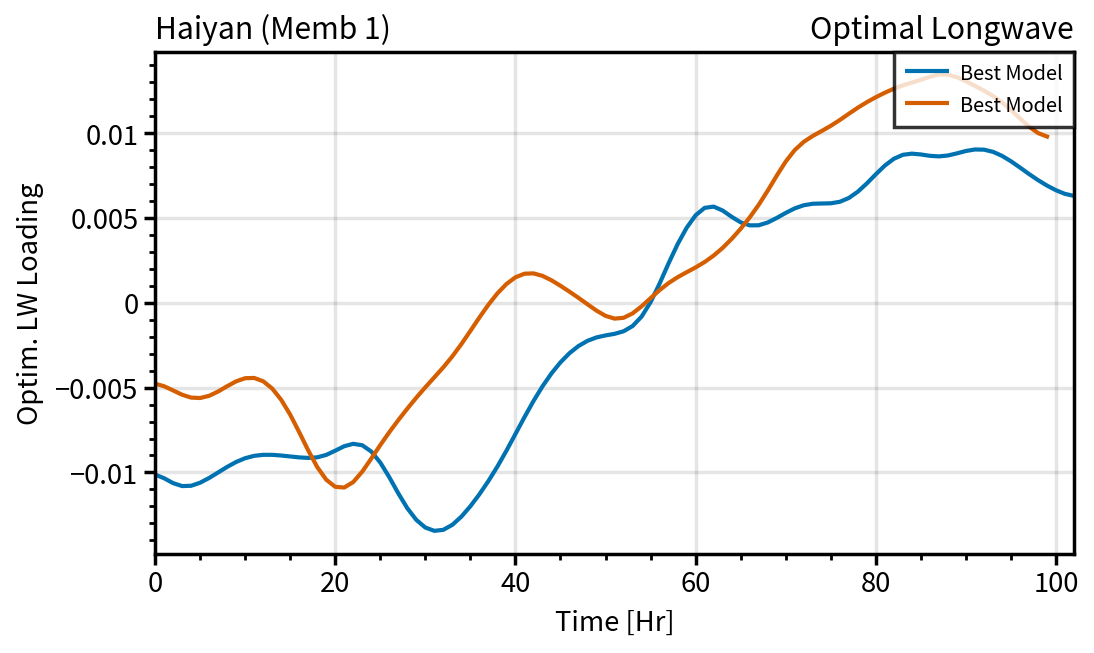

In [91]:
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=4.595,refaspect=1.831)
axs.plot((np.squeeze(timeseries_lw[2]))[0:103],label='Best Model')
axs.plot((np.squeeze(timeseries_lw[2]))[1150:1250],label='Best Model')
#axs.plot(-normalize_timeseries(np.squeeze(timeseries_lw[1]))[79:],label='2nd Best Model')
#axs.plot(normalize_timeseries(np.squeeze(timeseries_lw[0]))[79:],label='3rd Best Model')
axs.legend(loc='ur',ncols=1,prop={'size':8})
axs.format(xlabel='Time [Hr]',ylabel='Optim. LW Loading',ltitle='Haiyan (Memb 1)',rtitle='Optimal Longwave')
#plt.savefig('./pic/1228/optim_LW_timeseries_best.png',dpi=400)
plt.show()

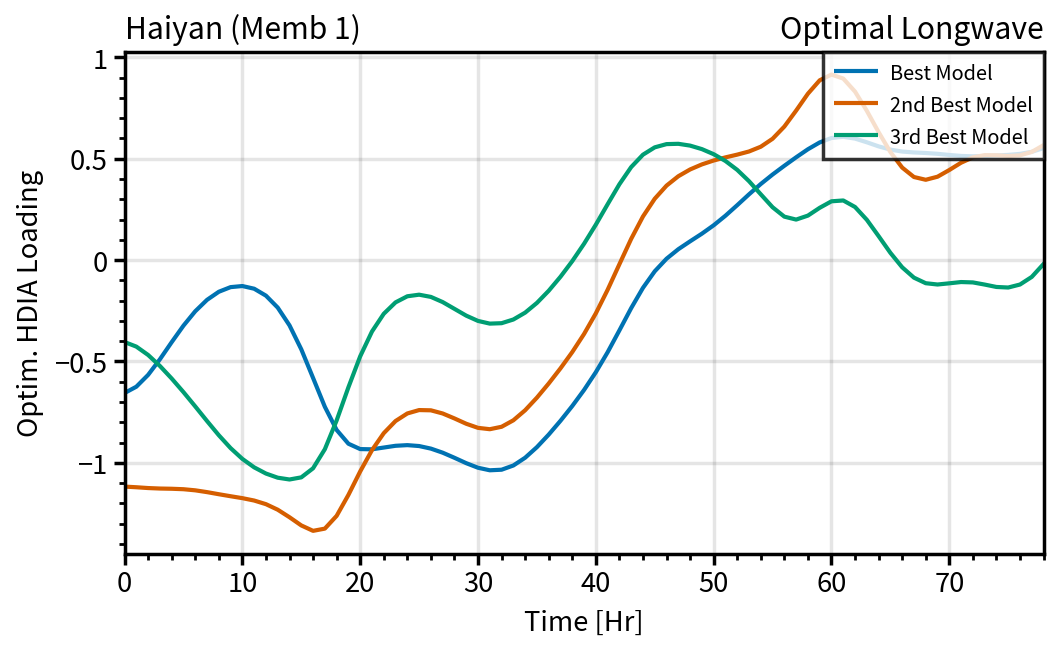

In [81]:
#timeseries_hdia = [np.dot(bestparams[i][4].detach().numpy(),normalize_timeseries(pcastore['hdia'].transform(haiyan_data['hdia'])[:,:82].T)) for i in range(3)]
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=4.595,refaspect=1.831)
axs.plot(normalize_timeseries(np.squeeze(timeseries_hdia[2]))[0:79],label='Best Model')
axs.plot(normalize_timeseries(np.squeeze(timeseries_hdia[1]))[0:79],label='2nd Best Model')
axs.plot(normalize_timeseries(np.squeeze(timeseries_hdia[0]))[0:79],label='3rd Best Model')
axs.legend(loc='ur',ncols=1,prop={'size':8})
axs.format(xlabel='Time [Hr]',ylabel='Optim. HDIA Loading',ltitle='Haiyan (Memb 1)',rtitle='Optimal Longwave')
#plt.savefig('./pic/1228/optim_LW_timeseries_best.png',dpi=400)
plt.show()